In [17]:
# %pip uninstall tweepy
%pip install tweepy==4.12.0
%pip install wordcloud
# %py -m pip uninstall matplotlib
%pip install -U matplotlib
%pip install stop-words


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests
import os
import json
import tweepy
import re
import csv

# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token = os.environ.get("BEARER_TOKEN")

client = tweepy.Client(bearer_token)

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
# expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields

csv_file = open('Tweets.csv', 'w')
csv_writter = csv.writer(csv_file)
csv_writter.writerow(['country', 'region', 'tag'])

countryList = ['SriLanka', 'India', 'Zimbabwe', 'Somalia',
               'Pakistan', 'Finland', 'England', 'Australia', 'Norway', 'USA']
regionList = ['Asia', 'Europe', 'Africa']

# countryList = ['SriLanka','India']
tagsFinalList = []


def Convert(string):
    li = list(string.split("#"))
    return li


def isValid(country, tagString):
    valid = True

    if (re.match('.*news.*', tagString.casefold()) or re.match('.*newz.*', tagString.casefold())):
        return False
    if ( tagString.casefold() == 'Twitter' ):
        return False
    if (country == 'SriLanka'):
        if (tagString.casefold() == 'dailymirror' or tagString.casefold() == 'vinodaya' or tagString.casefold() == 'adaderana' or tagString.casefold() == 'adaderanabiz'):
            return False
        else:
            return tagString not in countryList and tagString.casefold() != 'srilanka' and tagString.casefold() != 'srilanka.' and tagString.casefold() != 'LKA'.casefold() and tagString.casefold() != 'gossip'.casefold() and tagString.casefold() != 'gossip'.casefold()
    if (country == 'India'): 
            if (re.match('india.*', tagString.casefold())):
                return False
            else : return tagString not in countryList and tagString.casefold() != 'india'
    if (country == 'Zimbabwe'):
            if(re.match('zimbabwe*', tagString.casefold())):
                return False
            else: return tagString not in countryList and tagString.casefold() != 'zimbabweans'
    if (country == 'Somalia'):
            if(re.match('somali.*', tagString.casefold()) ) :
                return False
            else : return tagString not in countryList and tagString.casefold() != 'somalia'
    if (country == 'Pakistan'):
            if(re.match('pakistan.*', tagString.casefold()) ) :
                return False
            else: return tagString not in countryList and tagString.casefold() != 'pakistan'
    if (country == 'Finland'):
             ignoreList = ['usa', 'uk', 'germany', 'Belgium', 'australia', 'southafrica', 'Scotland']
             if( tagString.casefold() in ignoreList or re.match('finland.*', tagString.casefold()) or re.match('us.*', tagString.casefold())  ) : 
                return False 
             else: return tagString not in countryList and tagString.casefold() != 'finland'
    if (country == 'England'):
             ignoreList = ['usa', 'uk', 'germany', 'Belgium', 'australia', 'southafrica', 'Scotland', 'india']
             if( tagString.casefold() in ignoreList or re.match('england.*', tagString.casefold()) ) :
                return False 
             else : return re.match('uk.*', tagString.casefold()) or tagString not in countryList and tagString.casefold() != 'england'
    if (country == 'Australia'):
            ignoreList = ['usa', 'uk', 'germany', 'Belgium', 'australia', 'southafrica', 'Scotland', 'China', 'Iran']
            if( tagString.casefold() in ignoreList or re.match('australia.*', tagString.casefold())) :
                return False
            else: return tagString not in countryList and tagString.casefold() != 'australia'
    if (country == 'Norway'):
            ignoreList = ['usa', 'uk', 'germany', 'Belgium', 'australia', 'southafrica', 'Scotland', 'China', 'Iran', 'Sweden', 'France', 'switzerland', 'Spain']
            if( tagString.casefold() in ignoreList or re.match('norway.*', tagString.casefold())) :
                return False
            else: return tagString not in countryList and tagString.casefold() != 'norway'
    if (country == 'USA'):
            ignoreList = ['usa', 'uk', 'germany', 'Belgium', 'australia', 'southafrica', 'Scotland', 'China', 'Iran']
            if( tagString.casefold() in ignoreList or re.match('us.*', tagString.casefold())) : 
                return False
            else : return tagString not in countryList and tagString.casefold() != 'us'
    return valid


def findTweets(query_params, country, region):
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query_params, max_results=100).flatten(limit=1000):
        hashTags = re.findall('#.*\ ', tweet.text)
        if (len(hashTags) >= 1):
            tagList = Convert(hashTags[0])
            for tag in tagList:
                splitList = tag.split()
                if (len(splitList) >= 1):
                    tagsFinalList.append('#' + splitList[0])
                    tagString = splitList[0]
                    if (isValid(country, tagString)):
                        csv_writter.writerow(
                            [country, region, '#' + splitList[0]])


findTweets('#srilanka lang:en -is:retweet', 'SriLanka', 'Asia')
findTweets('#India lang:en -is:retweet', 'India', 'Asia')
findTweets('#zimbabweans lang:en -is:retweet', 'Zimbabwe', 'Africa')
findTweets('#somalia lang:en -is:retweet', 'Somalia', 'Africa')
findTweets('#Pakistan lang:en -is:retweet', 'Pakistan', 'Asia')


findTweets('#Finland lang:en -is:retweet', 'Finland', 'Europe')
findTweets('#England lang:en -is:retweet', 'England', 'Europe')
findTweets('#Australia lang:en -is:retweet', 'Australia', 'Oceania')
findTweets('#Norway lang:en -is:retweet', 'Norway', 'Europe')
findTweets('#Us lang:en -is:retweet', 'USA', 'US')

# Distinct List
mylist = list(dict.fromkeys(tagsFinalList))
csv_file.close()


In [19]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

tweetData = pd.read_csv('Tweets.csv')

nRow, nCol = tweetData.shape
print(f'There are {nRow} rows and {nCol} columns')
tweetData.describe()

color_list = list('rgbkymc')
plt.figure(figsize=(20,15))

# Country wise top 10
# 1st world vs 3rd world top 10
# Europe Vs Asia Trending List and comparission

for country in countryList :
 try:
     plot_data = tweetData[tweetData['country'] == country]
     plot_data['tag'].value_counts().nlargest(10).plot.bar()
     plt.title("Top Ten Topics for Country " + country)
     plt.ylabel("Number of Tweets mentionings (#Tag Topics)")
     plt.xlabel("#Tag Topics")
     plt.savefig(country)
     plt.clf()
 except Exception as e: print( "Exception =" + country + plot_data['tag'].value_counts())


 for region in regionList :
  try:
     plot_data = tweetData[tweetData['region'] == region]
     plot_data['tag'].value_counts().nlargest(10).plot.bar()
     plt.title("Top Ten Topics for Region " + region)
     plt.ylabel("Number of Tweets mentionings (#Tag Topics)")
     plt.xlabel("#Tag Topics")
     plt.savefig(region)
     plt.clf()
  except Exception as e: print( "Exception =" + region + plot_data['tag'].value_counts())

There are 32485 rows and 3 columns


<Figure size 2000x1500 with 0 Axes>

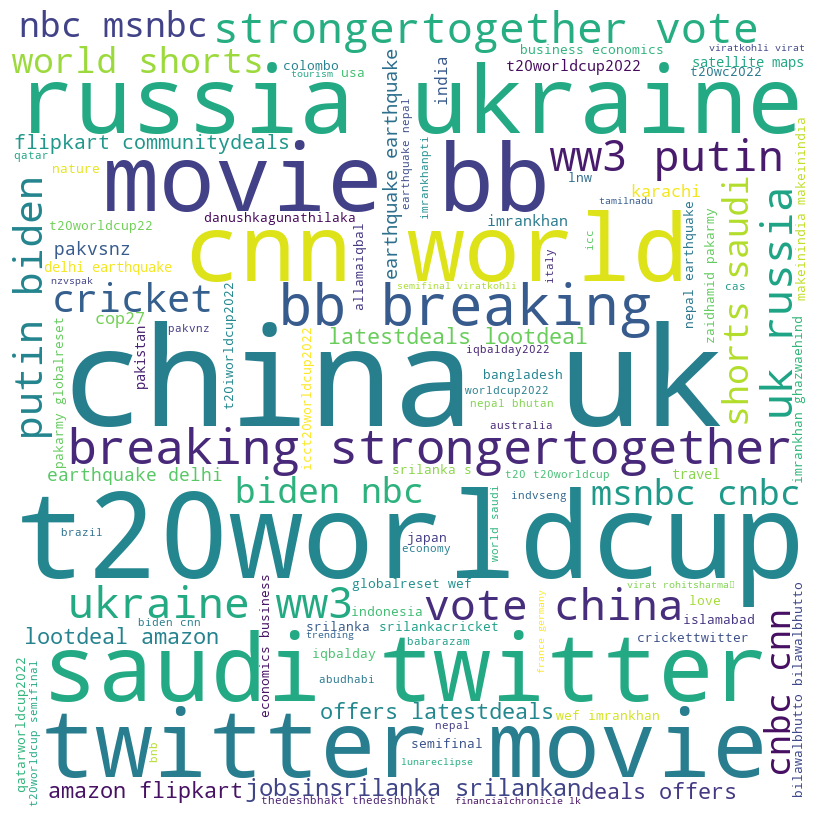

<Figure size 640x480 with 0 Axes>

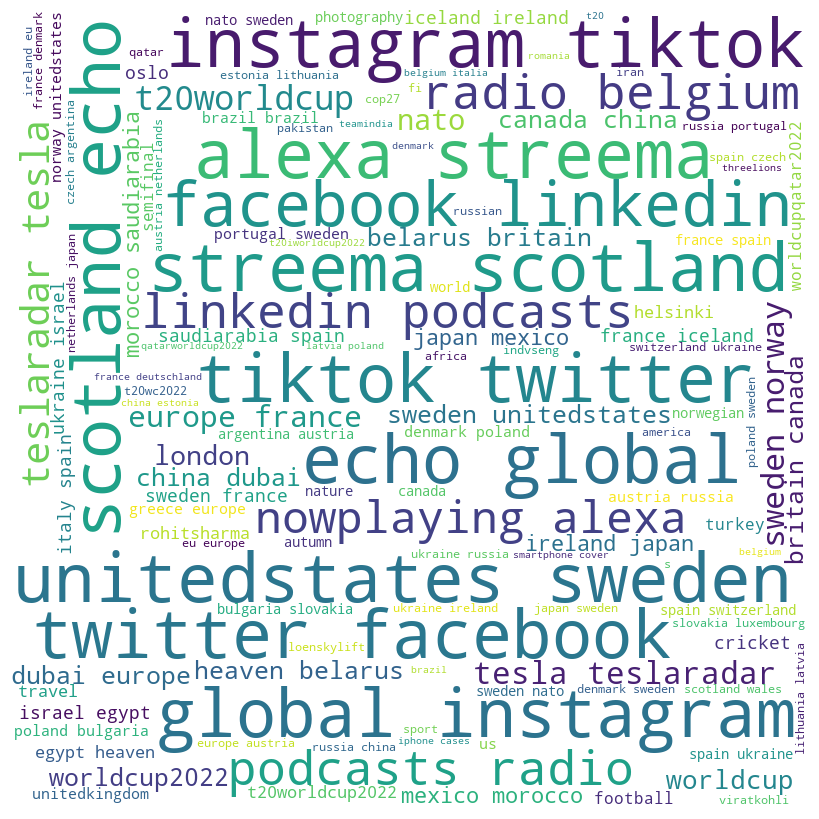

<Figure size 640x480 with 0 Axes>

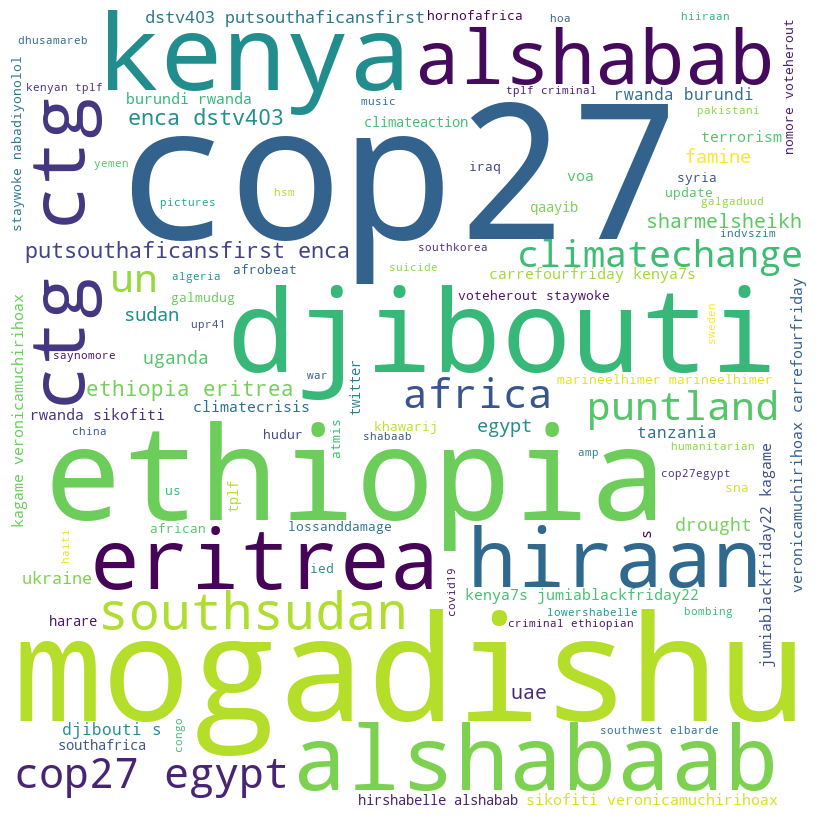

<Figure size 640x480 with 0 Axes>

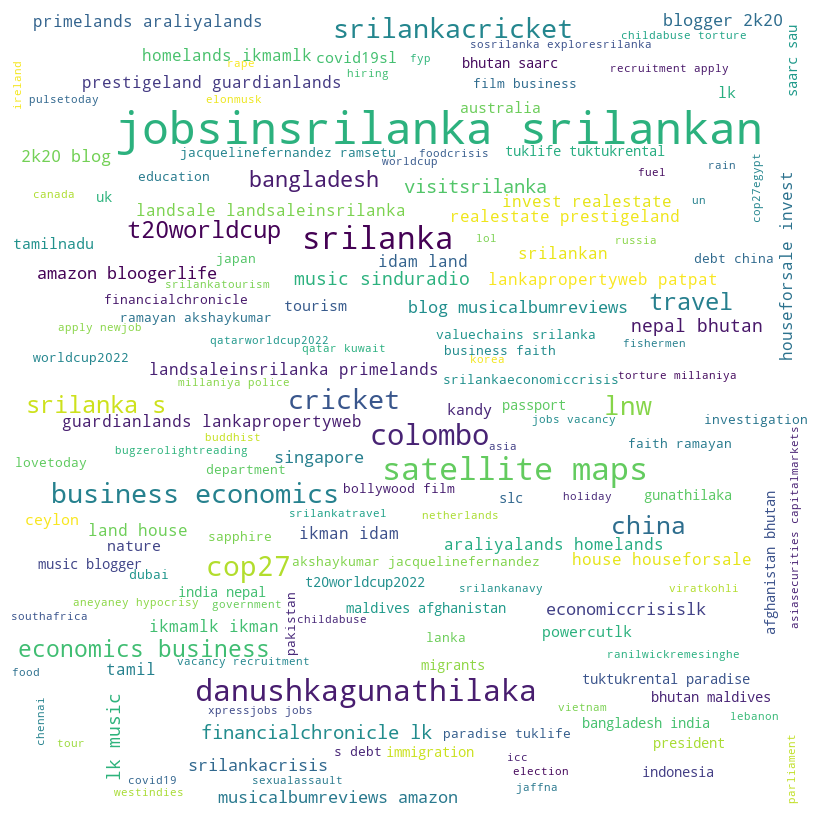

<Figure size 640x480 with 0 Axes>

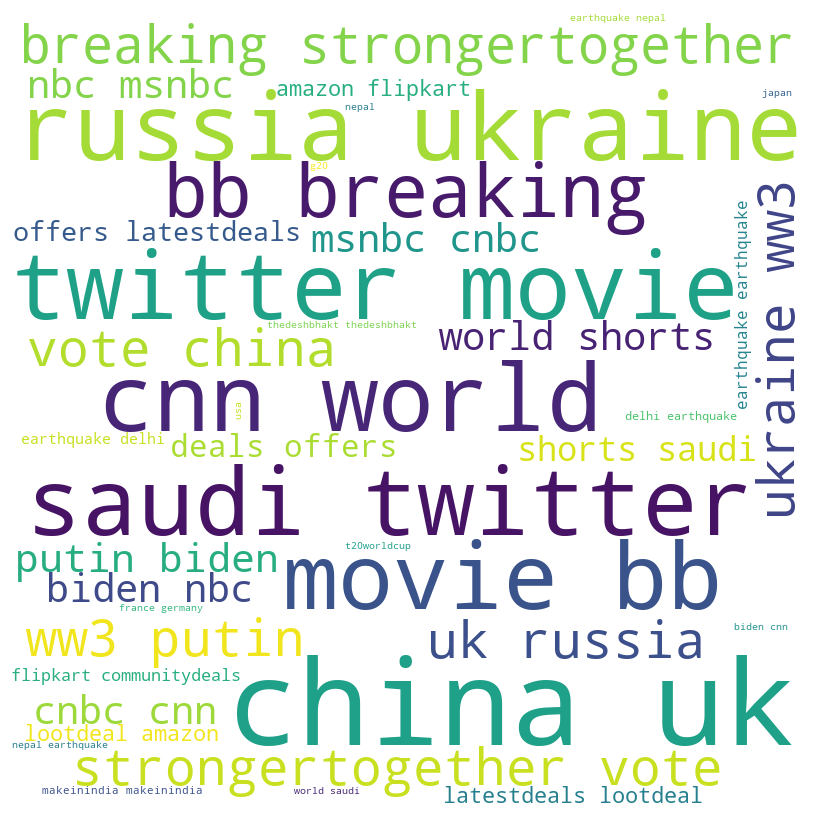

<Figure size 640x480 with 0 Axes>

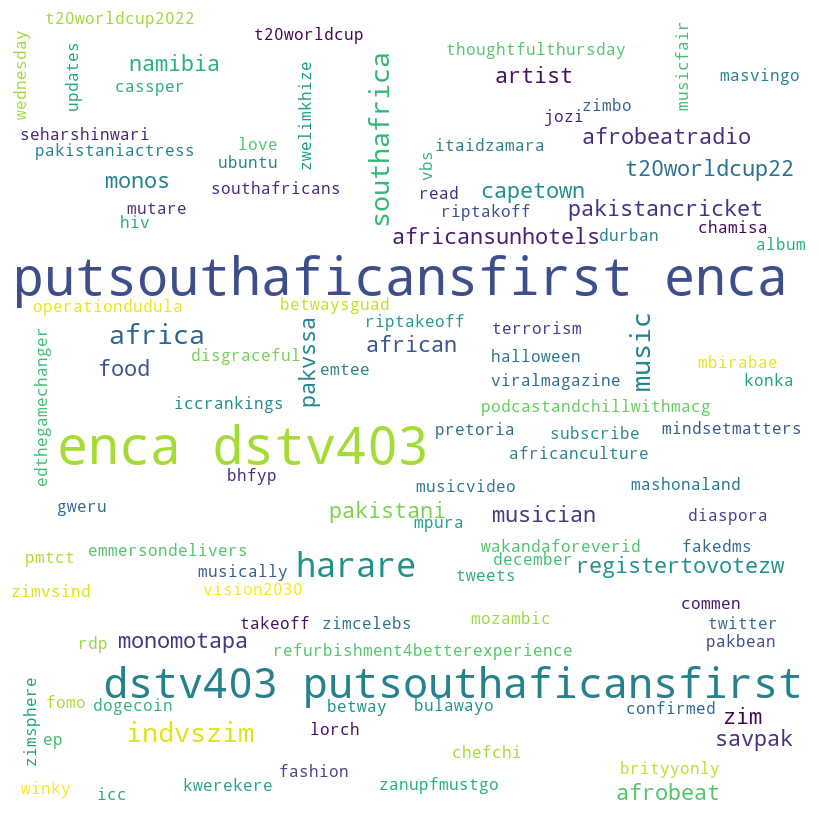

<Figure size 640x480 with 0 Axes>

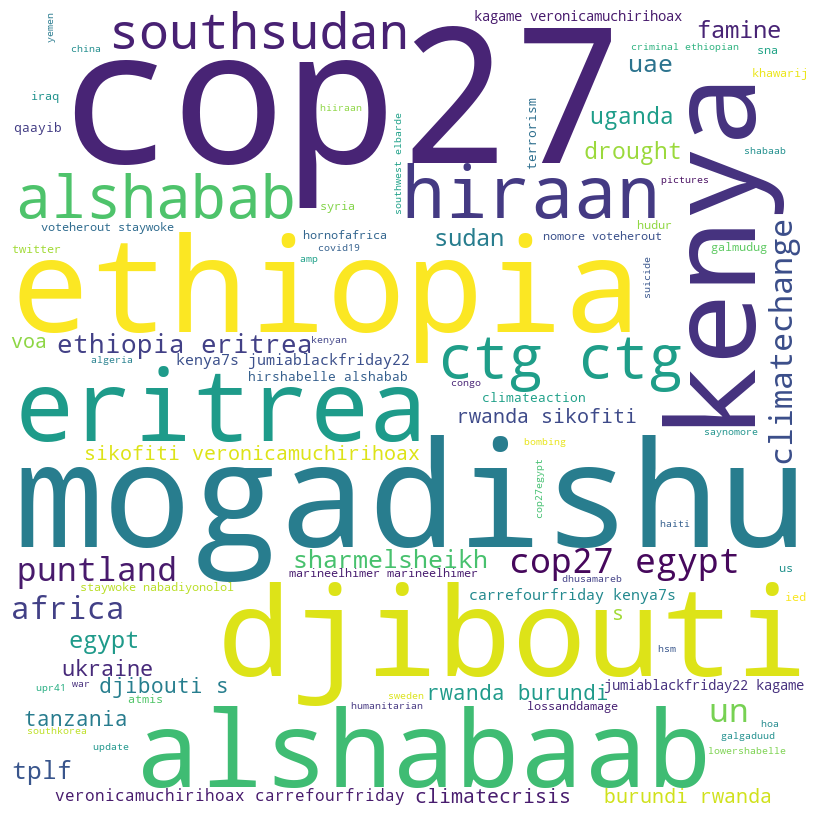

<Figure size 640x480 with 0 Axes>

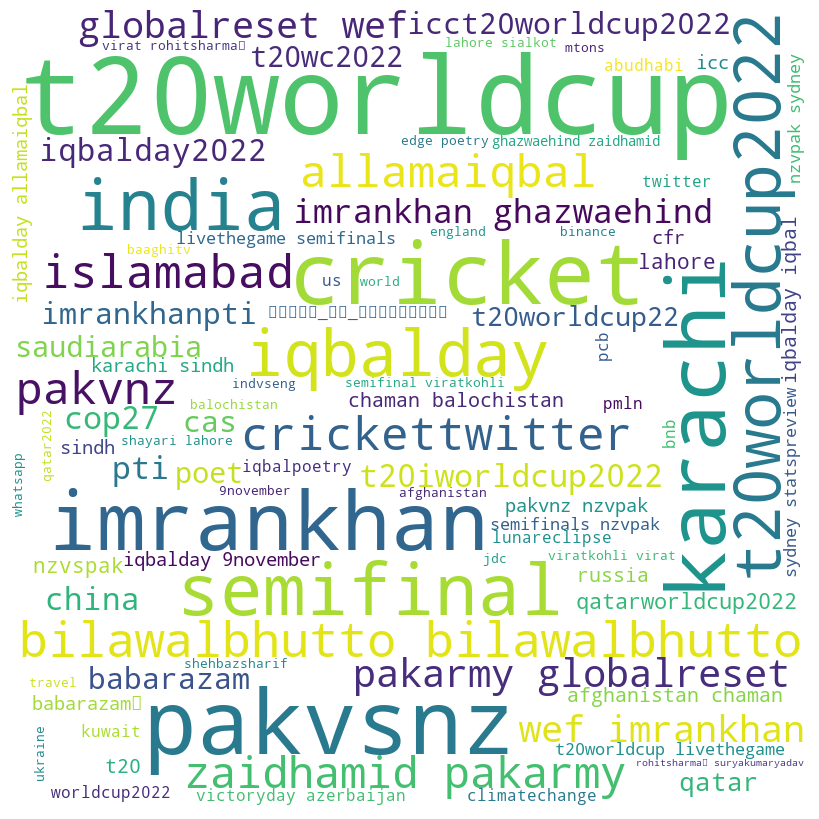

<Figure size 640x480 with 0 Axes>

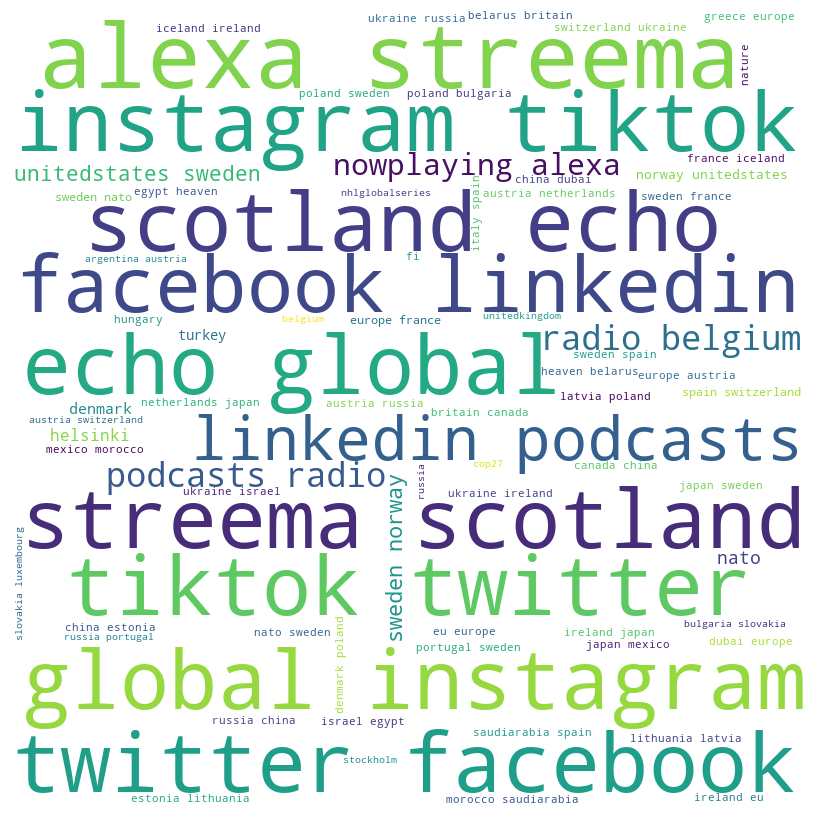

<Figure size 640x480 with 0 Axes>

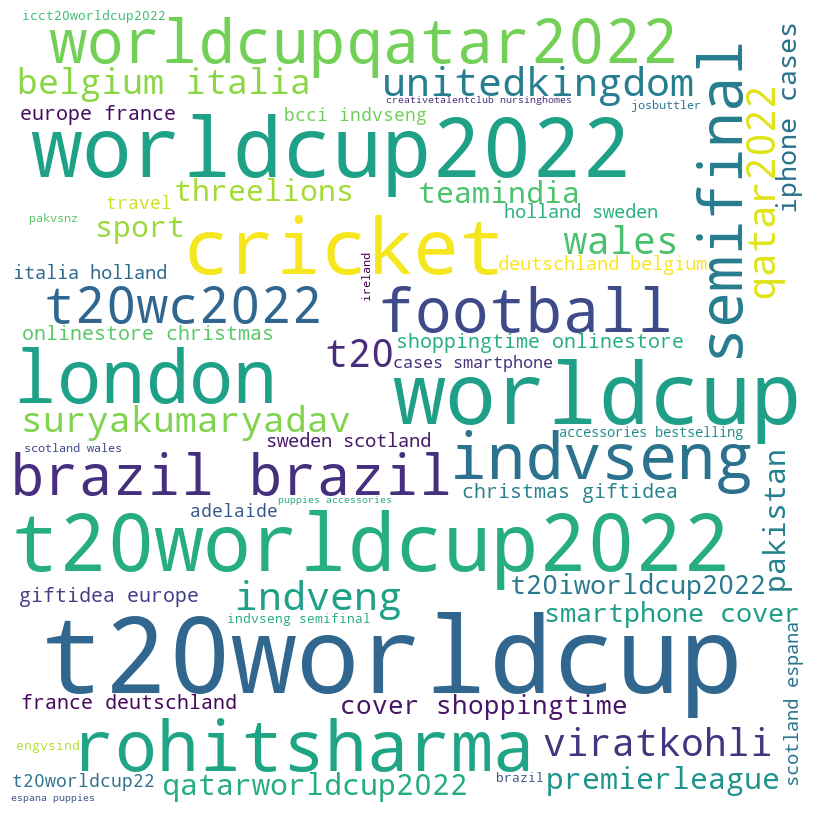

<Figure size 640x480 with 0 Axes>

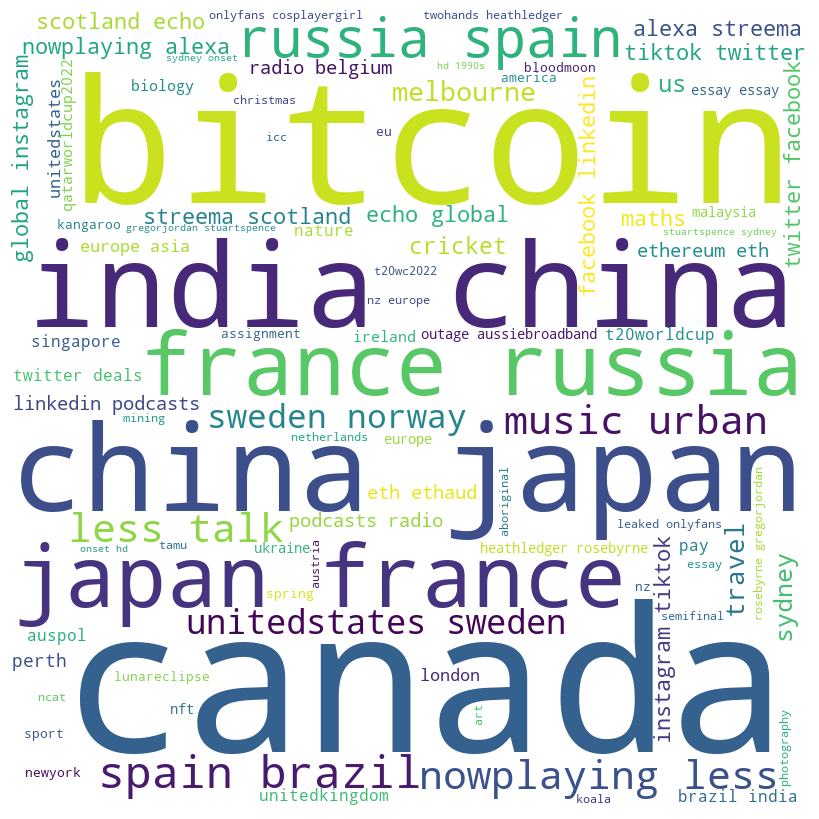

<Figure size 640x480 with 0 Axes>

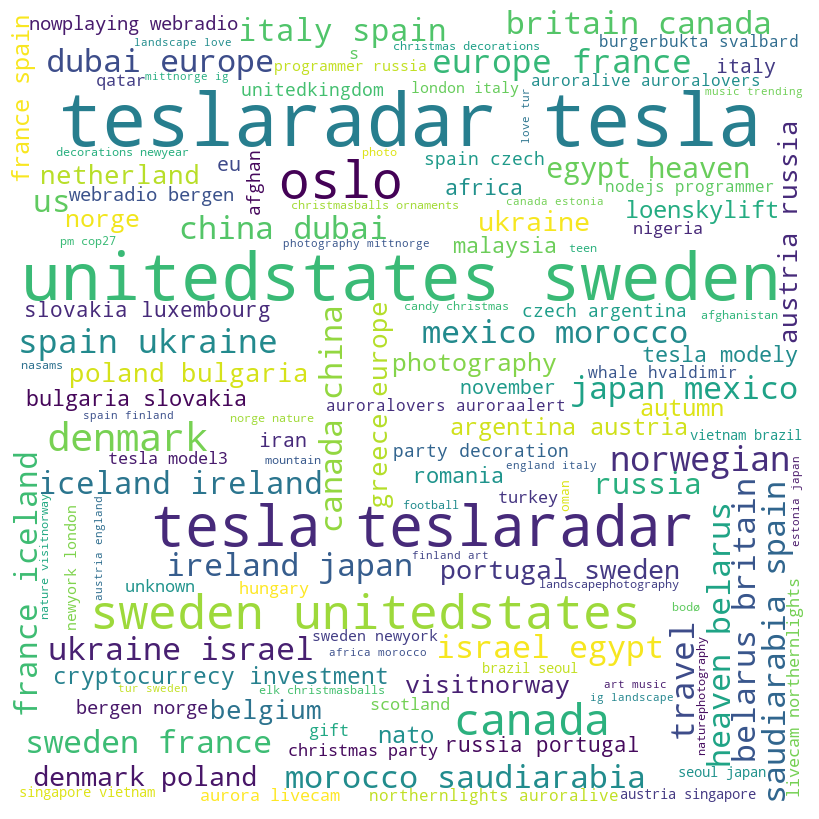

<Figure size 640x480 with 0 Axes>

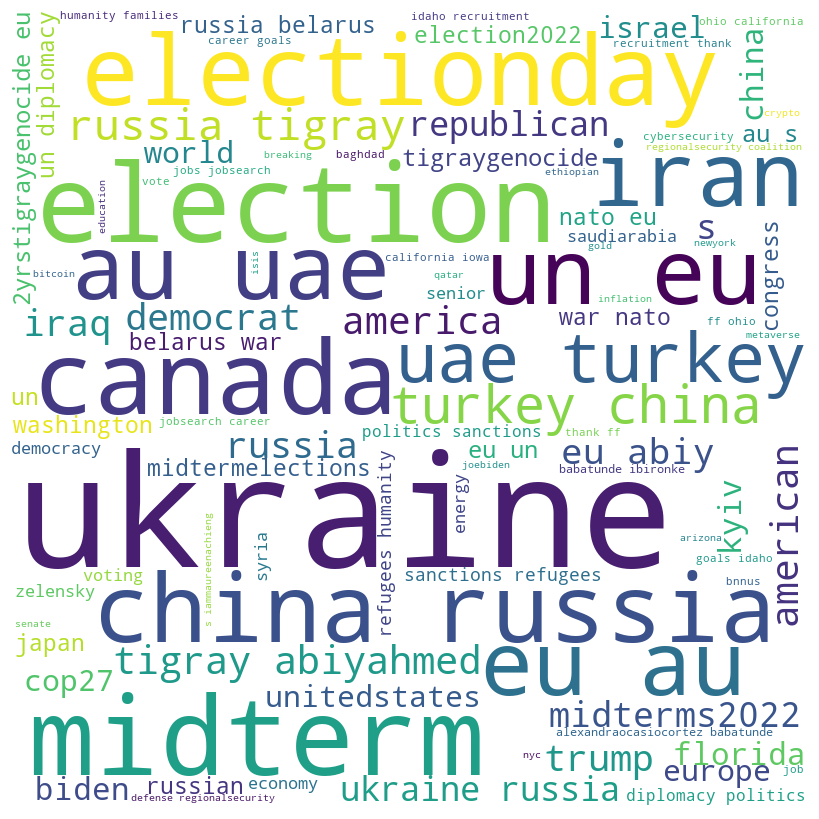

<Figure size 640x480 with 0 Axes>

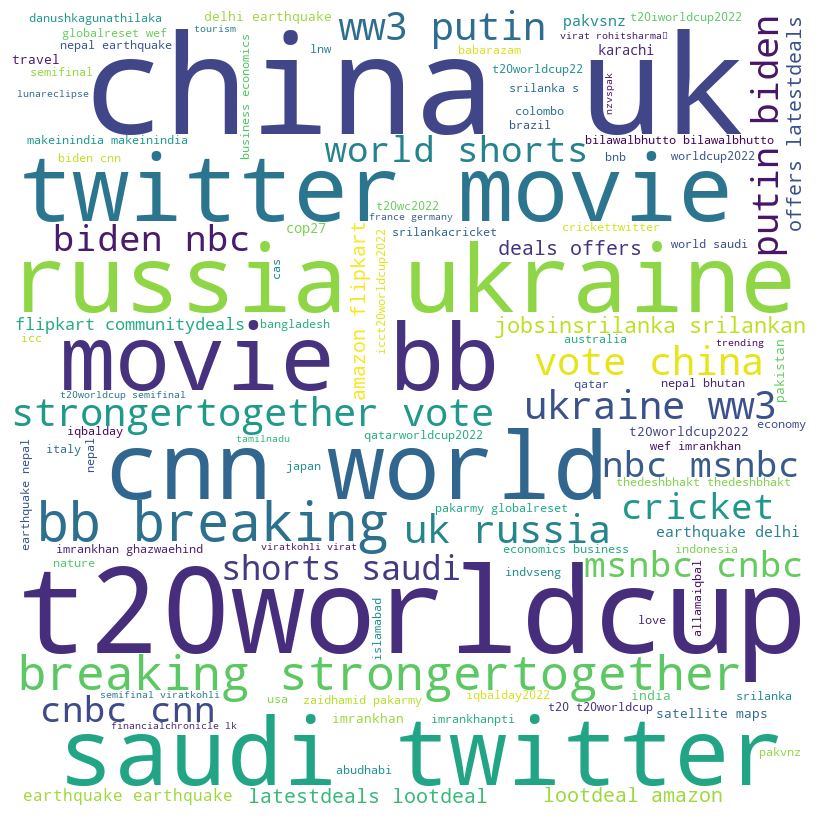

<Figure size 640x480 with 0 Axes>

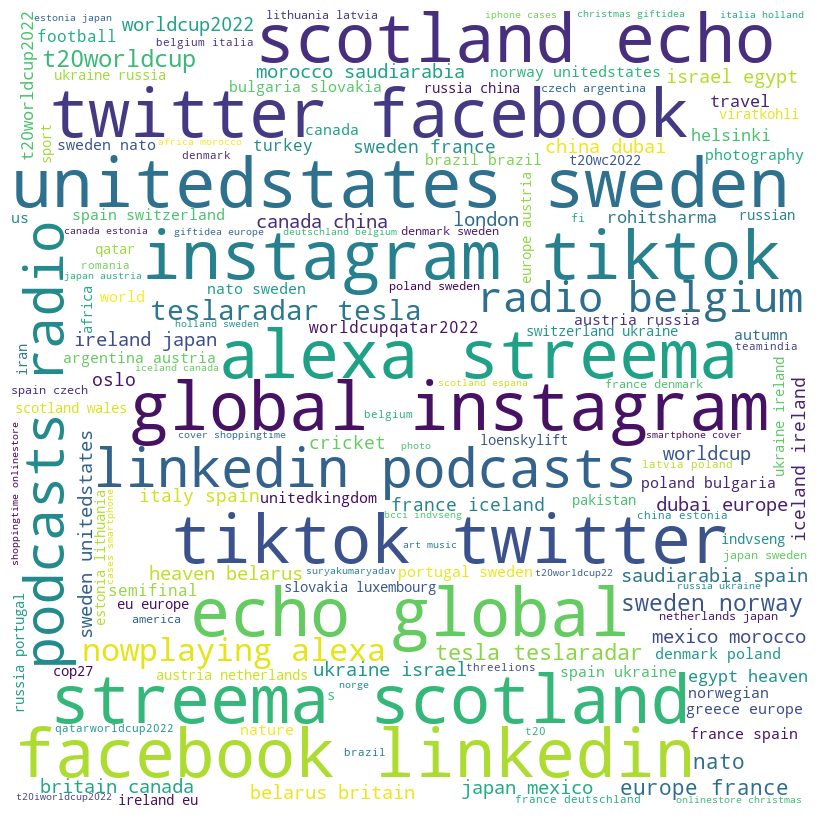

<Figure size 640x480 with 0 Axes>

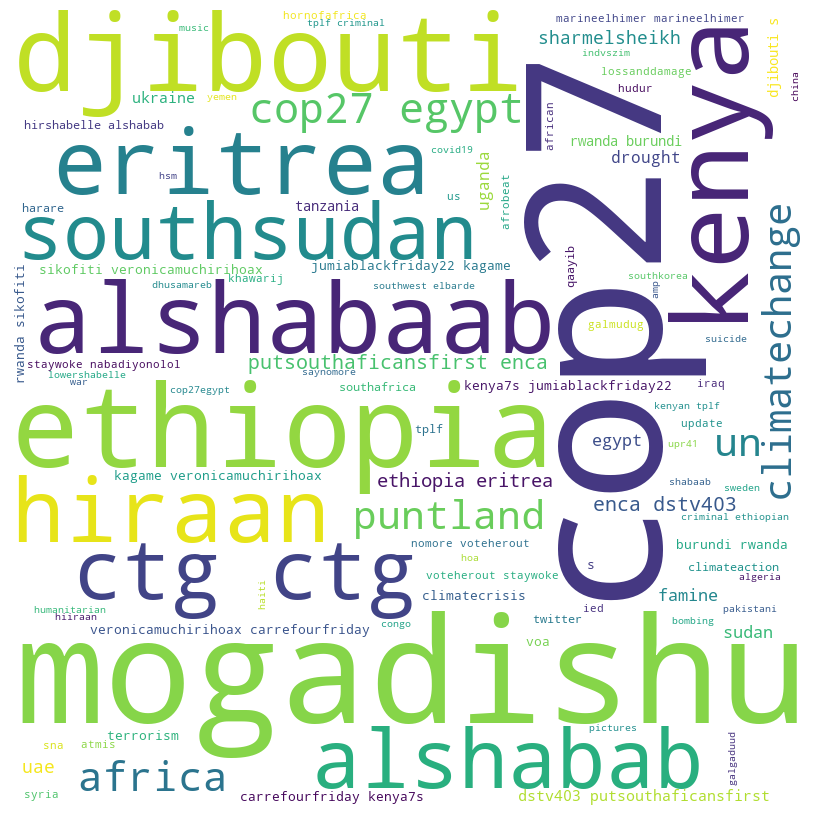

<Figure size 640x480 with 0 Axes>

In [20]:

stopwords = set(STOPWORDS)

# iterate through the csv file
for region in regionList :
    comment_words = ''
    plot_data = tweetData[tweetData['region'] == region]
    for val in plot_data.tag:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    # plt.savefig("WorldCloud_" + region)
    plt.clf()


for country in countryList:
    comment_words = ''
    plot_data = tweetData[tweetData['country'] == country]
    for val in plot_data.tag:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.clf()


for region in regionList :
    comment_words = ''
    plot_data = tweetData[tweetData['region'] == region]
    for val in plot_data.tag:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.clf()
